In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cwd = os.getcwd()
data_set_path = os.path.join(cwd,os.listdir()[5])

In [3]:
df = pd.read_csv(data_set_path)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average Salary,Company Text,Job State,Company Age,Job at HQ State,Python_yn,"Spark_,yn",R-studio_yn,AWS_yn,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n3.,NM,47,0,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n3.,MD,36,0,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n4.,FL,10,1,1,1,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n3.,WA,55,1,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n2.,NY,22,1,1,0,0,0,1


In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else: 
        return 'na'

In [5]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [6]:
df['job_simplified'].value_counts()

data scientist               279
na                           206
data engineer                119
data analyst                 102
machine learning engineer     22
director                      14
Name: job_simplified, dtype: int64

In [7]:
df['job_simplified'] = df['Job Title'].apply(seniority)

In [8]:
df['job_simplified'].value_counts()

na        520
senior    220
junior      2
Name: job_simplified, dtype: int64

In [9]:
df['Job State'].value_counts().tail()

 MN             2
 ID             2
 RI             1
 Los Angeles    1
 SC             1
Name: Job State, dtype: int64

In [10]:
#fix Los Angeles as a state
df['Job State'] = df['Job State'].apply(lambda x: x.replace('Los Angeles','CA'))

In [11]:
df['Job State'].value_counts().head()

 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
Name: Job State, dtype: int64

In [12]:
#rename job state column name
df.rename(columns={'Job State': 'job_state'}, inplace=True)

In [13]:
df['job_state'] = df.job_state.apply(lambda x: x.strip())

In [14]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Company Text,job_state,Company Age,Job at HQ State,Python_yn,"Spark_,yn",R-studio_yn,AWS_yn,Excel_yn,job_simplified
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research\n3.,NM,47,0,1,0,0,0,1,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System\n3.,MD,36,0,1,0,0,0,0,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4\n4.,FL,10,1,1,1,0,0,1,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL\n3.,WA,55,1,1,0,0,0,0,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions\n2.,NY,22,1,1,0,0,0,1,na


In [15]:
# job description
df['Description Length'] = df['Job Description'].apply(lambda x: len(x))
df['Description Length']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Description Length, Length: 742, dtype: int64

In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Minimum Salary', 'Maximum Salary',
       'Average Salary', 'Company Text', 'job_state', 'Company Age',
       'Job at HQ State', 'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn',
       'Excel_yn', 'job_simplified', 'Description Length'],
      dtype='object')

In [17]:
df['No of Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0 )

In [18]:
df['No of Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: No of Competitors, Length: 742, dtype: int64

In [19]:
df.rename(columns={'Minimum Salary':'min_sal'}, inplace=True)

In [20]:
df.rename(columns={'Maximum Salary':'max_sal'}, inplace=True)

In [21]:
# hourly wage to annual
df['max_sal'] = df.apply(lambda x: x.max_sal*2000 if x.Hourly == 1 else x.max_sal, axis=1)
df['min_sal'] = df.apply(lambda x: x.min_sal*2000 if x.Hourly == 1 else x.min_sal, axis=1)

In [22]:
df[['min_sal','max_sal']].tail()

,min_sal,max_sal
737,58,111
738,72,133
739,56,91
740,95,160
741,61,126


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_sal', 'max_sal', 'Average Salary',
       'Company Text', 'job_state', 'Company Age', 'Job at HQ State',
       'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn',
       'job_simplified', 'Description Length', 'No of Competitors'],
      dtype='object')

In [24]:
df['Company Text'] = df['Company Text'].apply(lambda x: x.replace('\n',''))

In [25]:
df['Company Text']

0                          Tecolote Research3.
1      University of Maryland Medical System3.
2                                    KnowBe44.
3                                       PNNL3.
4                         Affinity Solutions2.
                        ...                   
737                                      GSK3.
738                               Eventbrite4.
739           Software Engineering Institute2.
740                             Numeric, LLC3.
741             Riverside Research Institute3.
Name: Company Text, Length: 742, dtype: object

In [26]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,min_sal,max_sal,Average Salary,Company Age,Job at HQ State,Python_yn,"Spark_,yn",R-studio_yn,AWS_yn,Excel_yn,Description Length,No of Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,1375.304582,2058.831536,100.626011,46.591644,0.557951,0.528302,0.225067,0.002695,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,7276.804687,10851.496041,38.855948,53.778815,0.496965,0.499535,0.417908,0.051882,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,99.000000,73.500000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,127.000000,97.500000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,97.000000,160.000000,122.500000,59.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,54000.000000,94000.000000,254.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_sal', 'max_sal', 'Average Salary',
       'Company Text', 'job_state', 'Company Age', 'Job at HQ State',
       'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn',
       'job_simplified', 'Description Length', 'No of Competitors'],
      dtype='object')

<AxesSubplot:>

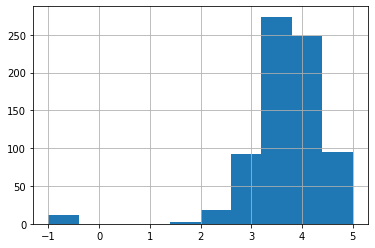

In [28]:
df.Rating.hist()

<AxesSubplot:>

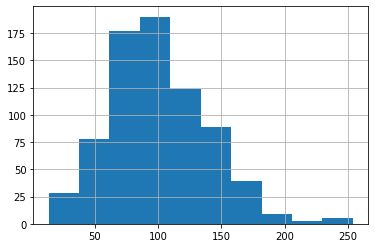

In [29]:
df['Average Salary'].hist()

<AxesSubplot:>

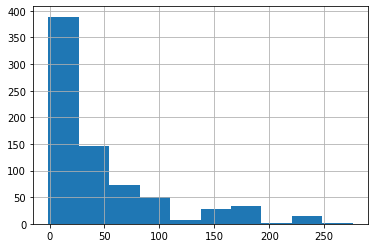

In [30]:
df['Company Age'].hist()

<AxesSubplot:>

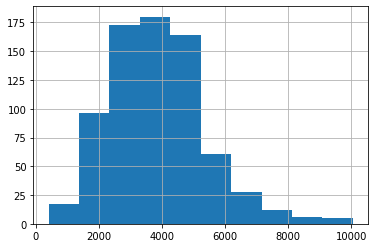

In [31]:
df['Description Length'].hist()

<AxesSubplot:>

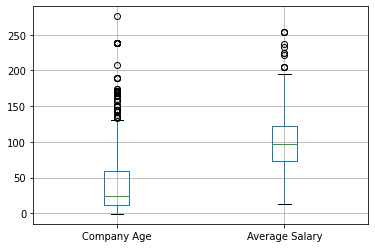

In [32]:
df.boxplot(column=['Company Age','Average Salary'])

<AxesSubplot:>

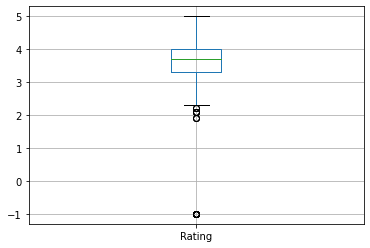

In [33]:
df.boxplot(column=['Rating'])

In [40]:
corr = df[['Company Age','Average Salary','Rating','Description Length','No of Competitors']].corr()

<AxesSubplot:>

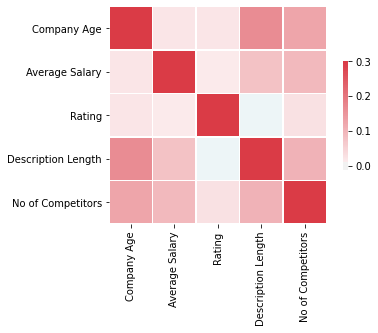

In [41]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [42]:
df['Revenue'].head()

0           $50 to $100 million (USD)
1              $2 to $5 billion (USD)
2          $100 to $500 million (USD)
3    $500 million to $1 billion (USD)
4            Unknown / Non-Applicable
Name: Revenue, dtype: object

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_sal', 'max_sal', 'Average Salary',
       'Company Text', 'job_state', 'Company Age', 'Job at HQ State',
       'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn',
       'job_simplified', 'Description Length', 'No of Competitors'],
      dtype='object')

In [44]:
df_cat = df[['Location', 'Headquarters','Size','Type of ownership','Industry','Sector','Revenue','Company Text','job_state','Job at HQ State'
   ,'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn','job_simplified']]

Graph for 200 Location


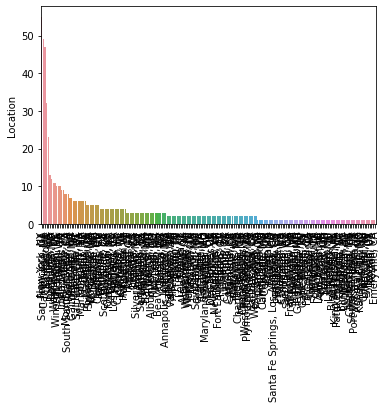

Graph for 198 Headquarters


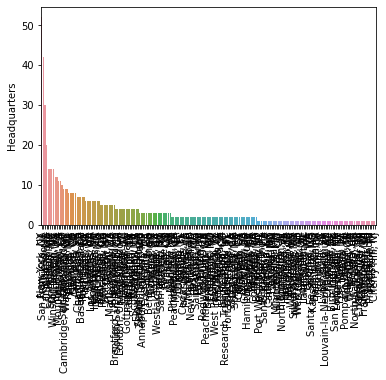

Graph for 9 Size


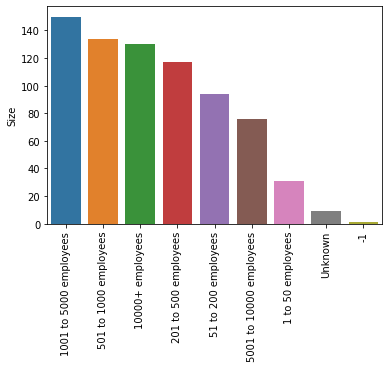

Graph for 11 Type of ownership


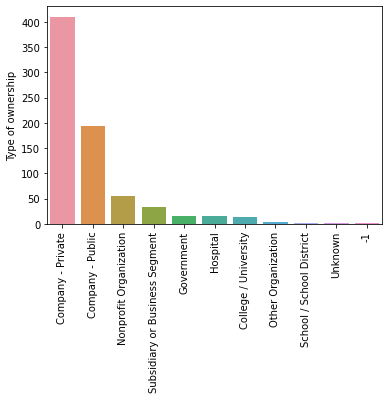

Graph for 60 Industry


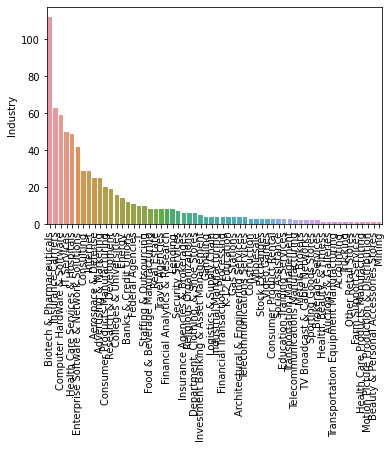

Graph for 25 Sector


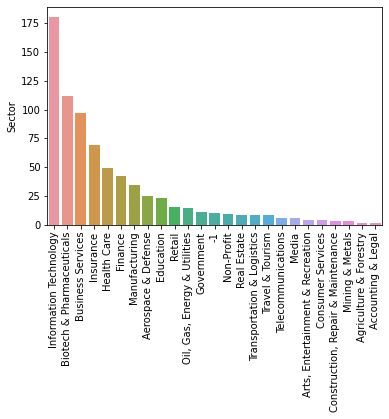

Graph for 14 Revenue


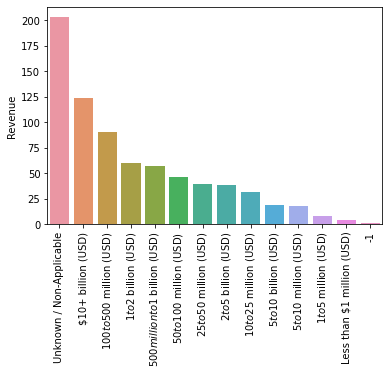

Graph for 343 Company Text


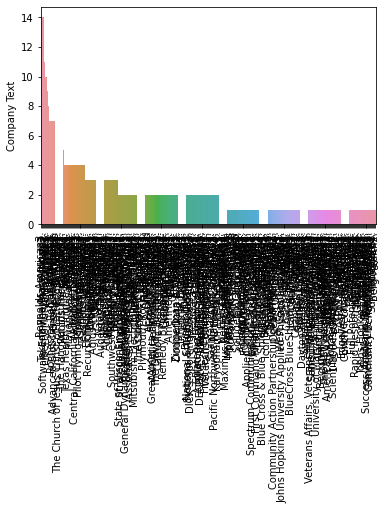

Graph for 37 job_state


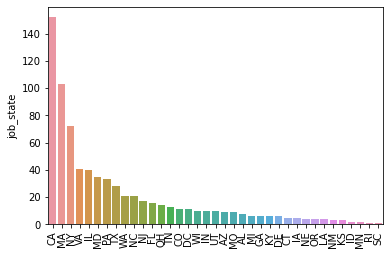

Graph for 2 Job at HQ State


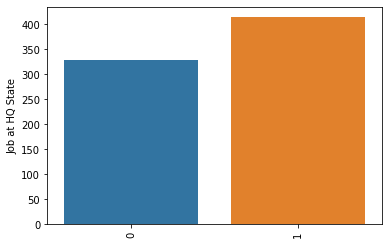

Graph for 2 Python_yn


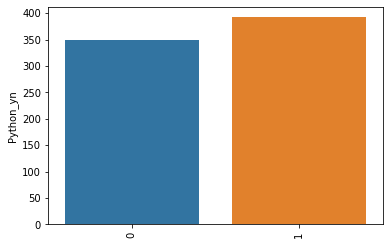

Graph for 2 Spark_,yn


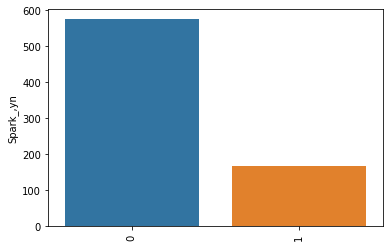

Graph for 2 R-studio_yn


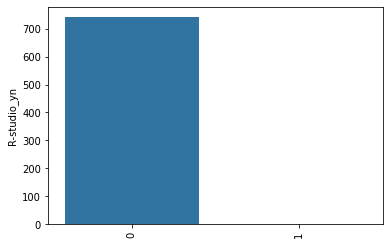

Graph for 2 AWS_yn


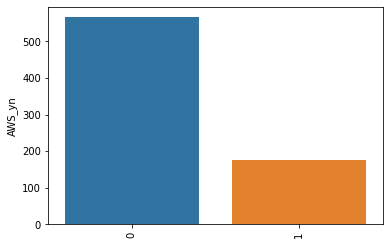

Graph for 2 Excel_yn


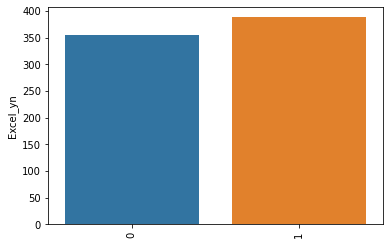

Graph for 3 job_simplified


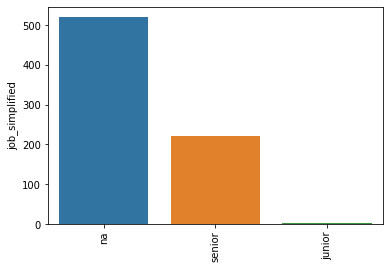

In [50]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %d %s' % (len(cat_num),i))
    bar_chart = sns.barplot(x=cat_num.index, y=cat_num)
    bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for 19 Location


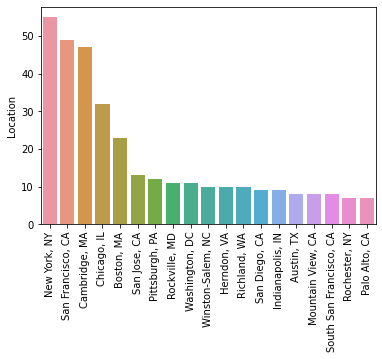

Graph for 19 Headquarters


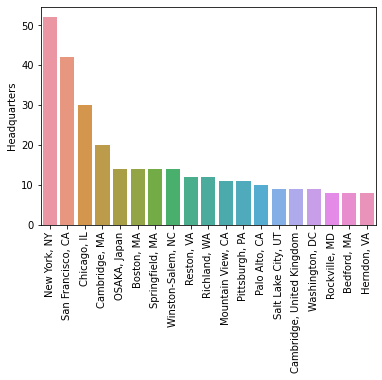

Graph for 19 Company Text


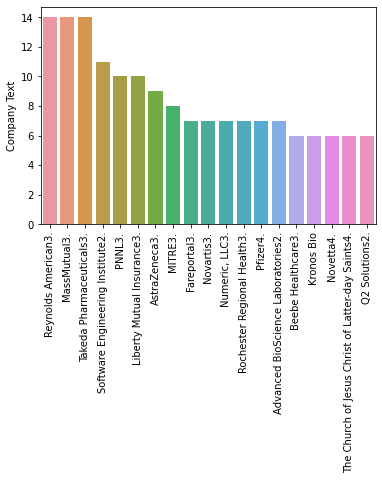

In [52]:
for i in df_cat[['Location','Headquarters','Company Text']].columns:
    cat_num = df_cat[i].value_counts()[:19]
    print('Graph for %d %s' % (len(cat_num),i))
    bar_chart = sns.barplot(x=cat_num.index, y=cat_num)
    bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation = 90)
    plt.show()

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_sal', 'max_sal', 'Average Salary',
       'Company Text', 'job_state', 'Company Age', 'Job at HQ State',
       'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn',
       'job_simplified', 'Description Length', 'No of Competitors'],
      dtype='object')

In [59]:
pd.pivot_table(df, index = ['job_state'], values='Average Salary').sort_values('Average Salary', ascending=False)

,Average Salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_sal', 'max_sal', 'Average Salary',
       'Company Text', 'job_state', 'Company Age', 'Job at HQ State',
       'Python_yn', 'Spark_,yn', 'R-studio_yn', 'AWS_yn', 'Excel_yn',
       'job_simplified', 'Description Length', 'No of Competitors'],
      dtype='object')

In [68]:
#rating, industry, sectr, revenue, number of comp, hourly, employer provided, oyrhon, r, spark, aws, excel, description length, type of ownership

df_pivots = df[['Rating','Industry','Sector','Revenue','No of Competitors','Hourly','Employer Provided','Python_yn','Spark_,yn','AWS_yn','Excel_yn','Average Salary']]
df_pivots.head()

,Rating,Industry,Sector,Revenue,No of Competitors,Hourly,Employer Provided,Python_yn,"Spark_,yn",AWS_yn,Excel_yn,Average Salary
0,3.8,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,1,0,0,1,72.0
1,3.4,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,1,0,0,0,87.5
2,4.8,Security Services,Business Services,$100 to $500 million (USD),0,0,0,1,1,0,1,85.0
3,3.8,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,0,0,0,76.5
4,2.9,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,1,0,0,1,114.5


In [72]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='Average Salary').sort_values('Average Salary', ascending=True))

Rating
        Average Salary
Rating                
 2.4         60.214286
 4.8         80.277778
 2.9         81.138889
 2.3         81.500000
 2.7         83.250000
 2.8         83.928571
 3.6         85.467391
 3.0         85.588235
 3.1         86.580000
 1.9         87.500000
 3.4         93.011364
 2.1         95.900000
 3.8         96.811475
 4.6         97.250000
 2.2         97.750000
 4.2        100.442308
 3.3        101.858974
 4.3        102.468750
 4.7        103.983871
 3.7        104.131148
 3.5        104.897959
 4.0        105.340426
 3.2        105.500000
 4.4        108.606061
 2.6        109.083333
 3.9        113.071429
 4.1        116.368421
 4.5        117.714286
 2.5        120.000000
 5.0        134.700000
-1.0        136.181818
Industry
                                          Average Salary
Industry                                                
Construction                                   26.500000
Telecommunications Manufacturing               44.0000

ValueError: Grouper for 'Average Salary' not 1-dimensional

In [73]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python_yn', values = 'Average Salary', aggfunc = 'count' )

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
